<a href="https://colab.research.google.com/github/Isaquintero2004/Analitica-de-Negocios/blob/main/RETO_N%C2%B05_ISABELA_QUINTERO_FERN%C3%81NDEZ.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **RETO N°5: REDES NEURONALES**
Implementar dos modelos neuronales, uno de tipo ADALINE y otro de tipo MADALINE (Multi-Adaptive Linea, Sin Bias) para evaluar el riesgo crédito en el otorgamiento de créditos de consumo utilizando para ello como variable de referencia el Score (Función Activación Relu) así como las variables socioeconómicas de entrada: Edad, Hijos, Personas a Cargo, Estrato, Ingresos, Egresos, Monto, Plazo, Cuota (9 variables).


0. Se instalan los paquetes de trabajo

In [1]:
#Paquete de trabajo
!pip install tensorflow

1. Se procede con la carga de las librerias de trabajo

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


2. Se procede con la carga de los datos

In [3]:
#Adjuntamos la base de datos a trabajar
nxl="/content/drive/MyDrive/ANALÍTICA DE NEGOCIOS/6. SolicitantesCrédito(USD).xlsx"
XDB=pd.read_excel(nxl, sheet_name=1) #usamos la hoja donde está toda la información
XDB.head()

#Variables a seleccionar
XDB=XDB[["Edad", "Hijos", "Perscargo", "Estrato", "Ingresos","Egresos","Monto (EAD)", "Plazo", "Cuota (COP)", "Score"]]

#Variables de Entrada y Salida
XD=np.array(XDB[["Edad", "Hijos", "Perscargo", "Estrato", "Ingresos","Egresos","Monto (EAD)", "Plazo", "Cuota (COP)"]])
XDn=XD/np.max (XD, axis=0) #Variables de entrada normalizado

yd=np.array(XDB[["Score"]])
ydn=yd/np.max(yd, axis=0) #Variable de salida normalizado

print("Los datos de entrada normalizados son:\n:", XDn)

Los datos de entrada normalizados son:
: [[0.52054795 0.14285714 0.         ... 0.15349289 0.8        0.02045638]
 [0.69863014 0.85714286 0.2        ... 0.03435935 0.6        0.00563566]
 [0.50684932 0.28571429 0.         ... 0.06982299 0.6        0.01145244]
 ...
 [0.52054795 0.         0.         ... 0.14598111 0.6        0.02394398]
 [0.5890411  0.14285714 0.4        ... 0.07497965 0.6        0.01229825]
 [0.50684932 0.14285714 0.4        ... 0.246751   0.6        0.04047237]]


# **ADALINE (Adaptive Linear)**

3. Se diseña la neurona artificial

Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


183/183 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0132
Epoch 2/100
183/183 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0109
Epoch 3/100
183/183 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0091
Epoch 4/100
183/183 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0074
Epoch 5/100
183/183 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0062
Epoch 6/100
183/183 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0052
Epoch 7/100
183/183 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0045
Epoch 8/100
183/183 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0039
Epoch 9/100
183/183 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0033
Epoch 10/100
183/183 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0030
Epoch 11/100
183/183 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0026
Epoch 12/100
183/183 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0025
Epoch 13/100
183/183 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0021
Epoch 14/100
183/183 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0020
Epoch 15/100
183/183 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step -

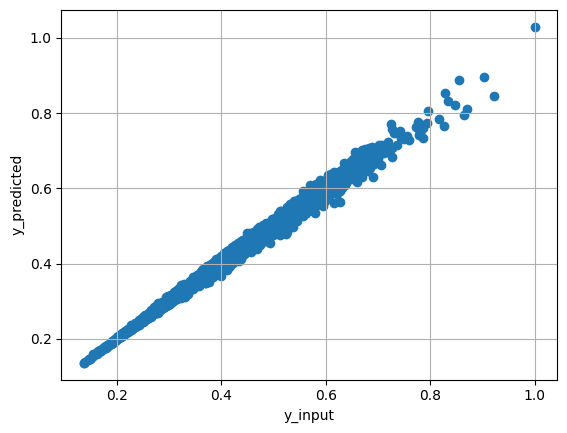

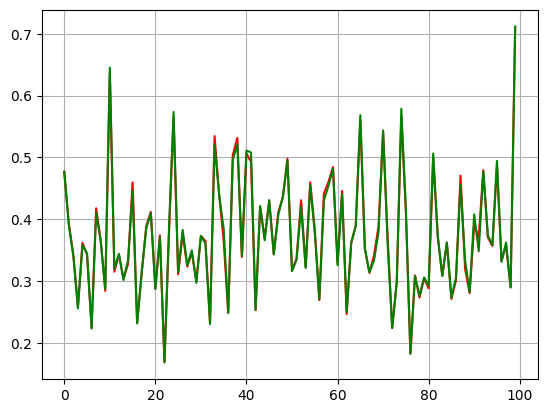

La correlación de los datos es:
           0         1
0  1.000000  0.996785
1  0.996785  1.000000
Las conexiones nerviosas son:
 [array([[ 0.16440704],
       [ 0.03416886],
       [ 0.02632444],
       [ 0.16400921],
       [ 0.4594154 ],
       [-0.09107528],
       [ 0.08097864],
       [ 0.15701163],
       [ 0.31833917]], dtype=float32)]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
El score del estimado es:
 [[733.81167509]]


In [4]:
#Configuramos el modelo
adaline=tf.keras.models.Sequential([
    tf.keras.layers.Dense(1, input_shape=(9,), activation="relu", use_bias=False)])
#Compilamos el modelo
adaline.load_weights("/content/pesos_adaline_L.weights.h5") #sgd es el gradiente en descenso para reducir el error a 0
adaline.compile(optimizer="sgd", loss="mse") #mse es el error y quiero que vaya a 0

history=adaline.fit(XDn, ydn, epochs=100) #Recorra la tabla de datos 100 veces
ydp=adaline.predict(XDn) #Predicción del modelo al final del aprendizaje

#Graficamos el modelo
#Grafica N°1
plt.figure()
plt.scatter(ydn, ydp)
plt.grid()
plt.xlabel("y_input")
plt.ylabel("y_predicted")
plt.show()

#Grafica N°2
plt.figure()
plt.plot(ydn[0:100], color="red")
plt.plot(ydp[0:100], color="green")
plt.grid()
plt.show()

#Determinamos la correlación
df=pd.DataFrame(np.column_stack((ydn, ydp)))
print("La correlación de los datos es:\n", df.corr())

#Las conexiones nerviosas son:
w=adaline.get_weights() #Pesos de las conexiones
print("Las conexiones nerviosas son:\n", w) #Cada resultado hace referencia a cada variable
#Monto es el que tiene la conexión nerviosa más potente porque su conexión nerviosa es de 0,5182 (resultado de la conexión nerviosa)

#Para evaluar un solicitante de crédito con las siguientes variables
Xsc=[[45, 1, 0, 4, 2000, 1000, 1200, 24, 60]]
Xscn=Xsc/np.max(XD, axis=0)
ydpsc=adaline.predict(Xscn)
print("El score del estimado es:\n", ydpsc*np.max(yd, axis=0)) #Multiplico para tener valores reales

# **MADALINE (Multi-Adaptive Linear)**

4. Se procede con el diseño del modelo MADALINE


Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


183/183 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0025
Epoch 2/100
183/183 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0023
Epoch 3/100
183/183 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0021
Epoch 4/100
183/183 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0022
Epoch 5/100
183/183 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0021
Epoch 6/100
183/183 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0020
Epoch 7/100
183/183 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0017
Epoch 8/100
183/183 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0017
Epoch 9/100
183/183 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0017
Epoch 10/100
183/183 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0016
Epoch 11/100
183/183 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0013
Epoch 12/100
183/183 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0013
Epoch 13/100
183/183 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0013
Epoch 14/100
183/183 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0012
Epoch 15/100
183/183 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step -

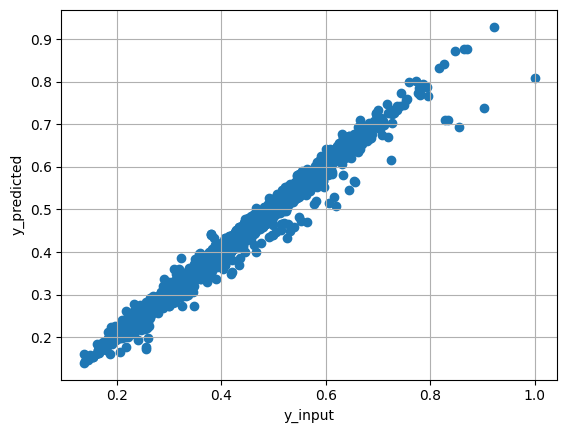

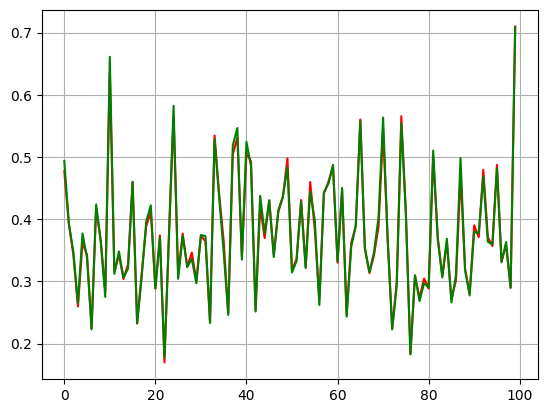

La correlación de los datos es:
           0         1
0  1.000000  0.993165
1  0.993165  1.000000
Las conexiones son:
 [[-4.6892500e-01 -2.6994804e-01 -7.5966477e-02 -5.2553761e-01
   2.9178256e-01  1.8911116e-01 -3.7479520e-01 -2.1064197e-01
  -3.1307194e-01 -1.9155977e-02]
 [ 1.4659797e-04  5.4070753e-01  3.3678278e-01  2.0519578e-01
   3.9572816e-02  6.8517961e-02  2.0120171e-01 -1.4015855e-01
  -5.5515999e-01  1.5459983e-01]
 [ 1.7569263e-01  7.3725022e-02 -4.6331066e-01  1.2859410e-01
  -9.4669666e-03  4.7833583e-01 -1.9260378e-01  4.7108814e-01
   1.2468324e-01 -3.7190363e-02]
 [ 3.0890062e-01  5.2288276e-01  4.4705406e-01  5.7035476e-01
   2.1006700e-01 -1.6717726e-02 -2.7506578e-01 -2.0541549e-01
  -7.9720624e-02 -3.5864031e-01]
 [-2.3719123e-02  5.0994843e-01 -3.7999681e-01 -3.2058138e-02
   1.0134243e-01  1.9652025e-01  4.5438230e-01 -4.0915441e-02
   3.4046744e-03 -8.3510064e-02]
 [ 7.4388810e-02 -1.5928508e-01  2.0830181e-01  7.4149311e-02
   2.7068084e-01 -5.1889610e-01 -

,Edad,Hijos,Perscargo,Estrato,Ingresos,Egresos,Monto (EAD),Plazo,Cuota (COP)
0,0.201773,0.299243,-0.170827,0.29782,0.100561,0.300123,0.280426,0.290982,-0.202689


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
El score del estimado es:
 [[634.73653801]]


In [5]:
madaline=tf.keras.models.Sequential([
    tf.keras.layers.Dense(10, input_shape=(9,), activation="relu", use_bias=False), #Capa N°1 - 10 regresiones lineales
    tf.keras.layers.Dense(1, activation="relu", use_bias=False)]) #Capa N°2 - Núcleo o Salida

#10 entradas ocultas o regresiones, 9 variables de entrada

madaline.load_weights("/content/pesos_madaline_L.weights.h5")
madaline.compile(optimizer="sgd", loss="mse") #sgd=solve descend gradient
                                              #mse=Mean square error - quiero que sea cero
history=madaline.fit(XDn, ydn, epochs=100)    #Recorrer 100 veces la tabla de datos
ydp=madaline.predict(XDn)                     #Pronóstico al final del aprendizaje

#Graficamos el modelo
#Grafica N°1: correlación
plt.figure()
plt.scatter(ydn, ydp)
plt.grid()
plt.xlabel("y_input")
plt.ylabel("y_predicted")
plt.show()

#Grafica N°2: Pronóstico
plt.figure()
plt.plot(ydn[0:100], color="red")
plt.plot(ydp[0:100], color="green")
plt.grid()
plt.show()

#Determinamos la correlación
df=pd.DataFrame(np.column_stack((ydn, ydp)))
print("La correlación de los datos es:\n", df.corr())

#Obtenemos las conexiones nerviosas de la red - como se dispersan las conexiones nerviosas
WC=madaline.get_weights() #Estas son las capas
W=WC[0]; C=WC[1]
print("Las conexiones son:\n", W) #Conexiones nerviosas (10 regresiones), capa N°0 de 4-10 y la capa N°1 va de 10-1
a=W@C #Producto entre las conexiones, como los W pasan por los C
      #a: son los efectos independientes de las variables sobre la salida
      #cual es más importante que otro, y cual tiene un efecto positivo o negativo sobre la salida
df2=pd.DataFrame(a.T)
df2.columns=["Edad", "Hijos", "Perscargo", "Estrato", "Ingresos","Egresos","Monto (EAD)", "Plazo", "Cuota (COP)"]
display(df2) #Muestra el peso que tiene cada variable sobre la salida

#Como evaluar un nuevo solicitante de crédito
Xsc=[[45, 1, 0, 4, 2000, 1000, 1200, 24, 60]]
Xscn=Xsc/np.max(XD, axis=0)
ydpsc=madaline.predict(Xscn)
print("El score del estimado es:\n", ydpsc*np.max(yd, axis=0))

# **ANÁLISIS DE RESULTADOS**

## **Descripción de las variables:**
La base de datos usada para este modelo es la que se ha venido trabajando a lo largo del semestre, hace referencia a un conjunto de información socioeconómica y financiera de personas que han solicitado un crédito. Su objetivo principal es evaluar el otorgamiento o no de créditos dependiendo un score o puntaje, utilizando variables clave que reflejan su capacidad y comportamiento financiero. Las variables que se usaron en el modelo son:

* **Edad:** Representa la edad del solicitante en años. Es un factor relevante porque puede relacionarse con la estabilidad laboral, el nivel de experiencia financiera y la etapa de vida en la que se encuentra la persona.
* **Hijos:** Número total de hijos del solicitante, puede incidir en los compromisos económicos del individuo y en su capacidad para asumir nuevas obligaciones financieras.
* **Personas a Cargo:** Indica cuántas personas dependen económicamente del solicitante (además de los hijos).
* **Estrato:** Hace referencia al nivel socioeconómico del hogar del solicitante, clasificado en un rango de 1 a 6.
* **Ingresos:** Corresponde al monto mensual que percibe el solicitante como ingreso, el dinero que el solicitante recibe de manera segura y constante.
* **Egresos:** Representa el total mensual de gastos fijos y variables del solicitante, es decir, cuánto gasta el solicitante en un período de tiempo, casi siempre es un mes.
* **Monto (EAD):** Es el valor total del crédito solicitado. Esta variable indica cuánto dinero se le estaría prestando al cliente.
* **Plazo:** Número de meses pactados para pagar el crédito. Se mide en cantidad de meses.
* **Cuota (COP):** Es el valor mensual que tendría que pagar el solicitante si se le aprueba el crédito.

Además, como variable de referencia o predictiva está el **score** este es una calificación numérica que representa el nivel de riesgo crediticio de una persona. Cuanto más alto sea el score, menor es el riesgo de incumplimiento de pago por parte del solicitante. Esta variable es calculada a partir de las características socioeconómicas del individuo, y en este caso, se estima mediante redes neuronales con base a las nueve variables expuestas anteriormente. Se utiliza como referencia principal para tomar decisiones sobre el otorgamiento o no de un crédito.

## **Análisis de resultado**
Para este reto se emplearon dos modelos: Adaline, que es una red neuronal con una sola neurona, y Madaline, una red más compleja con una capa oculta de 10 neuronas. En el caso del modelo Adaline, los pesos obtenidos representan directamente la importancia de cada variable de entrada en la estimación del Score. Entre estos pesos, se identificó que la variable “Ingresos” presenta el peso más alto, con un valor aproximado de 0,4593. Esto indica que es la variable con mayor influencia positiva sobre el Score, es decir, a mayor cantidad de ingresos, mayor será la estimación del Score. Las demás variables también tienen influencia, ya sea positiva o negativa, pero su impacto es menor en comparación con el “Ingreso”. Por el contrario, la variable "Egresos" indica la variable con menor puntaje o fuerza dentro del modelo, con un valor de -0,091, los "egresos" disminuyen el valor del score para los solicitantes del crédito.

Por otro lado, en el modelo Madaline se estimaron los efectos independientes de cada variable. Este resultado permitió conocer la contribución de cada una de las nueve variables de entrada en el resultado final del Score. En este modelo, se generó un DataFrame que organiza estos efectos por variable, permitiendo observar cuáles tienen un efecto positivo (incrementan el Score) y cuáles un efecto negativo (lo disminuyen). En este sentido, las variables con valores positivos favorecen una mayor calificación en el Score, a este grupo hacen referencia Edad, hijos, Estrato, Ingresos, Egresos, Monto (EAD), y plazo, siendo la variable egresos con un puntaje de 0,30017 la que mayor influencia y determina el aumento en el score. Mientras que aquellas con valores negativos como personas a cargo y cuota (COP) tienden a reducirla, sobretodo en mayor medida la cuota con un valor de -0,20.

Para ambos casos el modelo mostró una correlación bastante positiva. En el modelo Adaline, todas las correlaciones superaron el 99%, lo mismo sucedió en el modelo Madaline lo que demuestra la efectividad del mismo y la fuerte correlación que se tienen entre las variables al momento de determinar el score. Ahora bien, al evaluar a un nuevo solicitante bajo las características definidas (Edad (45), Hijos (1), Personas a Cargo (0), Estrato (4), Ingresos (2000), Egresos (1000), Monto (1200), Plazo (24), Cuota (60)) los resultados difieren entre ambos casos, pero esto se debe por el número de regresiones lineales que se cuenta para cada caso, que determinan el peso e importancia de cada variable en la obtención del resultado. Para el caso de Adaline el puntaje del solicitante fue de 733,4 mientras que en Madaline de 634,83 este último resultado menor se ve afectado por las dos variables negativas que se presentan en el modelo (egresos y cuota), caso que no ocurre en Adaline donde solo una de las 9 variables disminuye el valor del puntaje (egresos).

En conclusión, el análisis comparativo entre los modelos Adaline y Madaline permitió identificar y valorar la influencia de las variables de entrada sobre el Score de un solicitante. A pesar de las diferencias en los pesos y efectos individuales, ambos modelos demostraron una alta capacidad predictiva, con correlaciones superiores al 99%, lo que valida su efectividad. La diferencia en los puntajes obtenidos por un solicitante específico en cada modelo (733,4 en Adaline vs. 634,83 en Madaline) se explica por la forma en que cada red pondera las variables, destacando cómo la complejidad del modelo influye en la sensibilidad frente a distintos factores. El modelo Madaline, al ser más complejo, permite una lectura más detallada del papel de cada variable, y facilita distinguir tanto la dirección como la intensidad del efecto. Este análisis es útil para interpretar la lógica de decisión de los modelos y entender qué factores están favoreciendo o afectando negativamente la estimación del Score en los casos evaluados.